In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

In [2]:
df=pd.read_csv('/content/drive/MyDrive/ML Dataset/loan_data (1).csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [13]:
# Converting purpose column to numerical
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
df.purpose=le.fit_transform(df.purpose)

# EDA

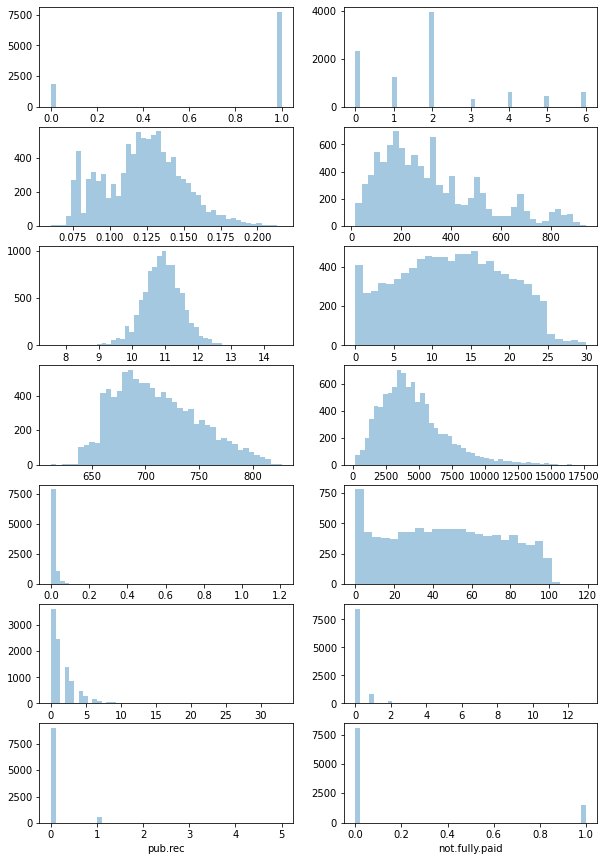

In [30]:
# Histograms
col=df.columns
plt.figure(figsize=(10,15))
for i in range(len(col)):
  plt.subplot(7,2,i+1)
  sns.distplot(df[col[i]],kde=False)
plt.show()

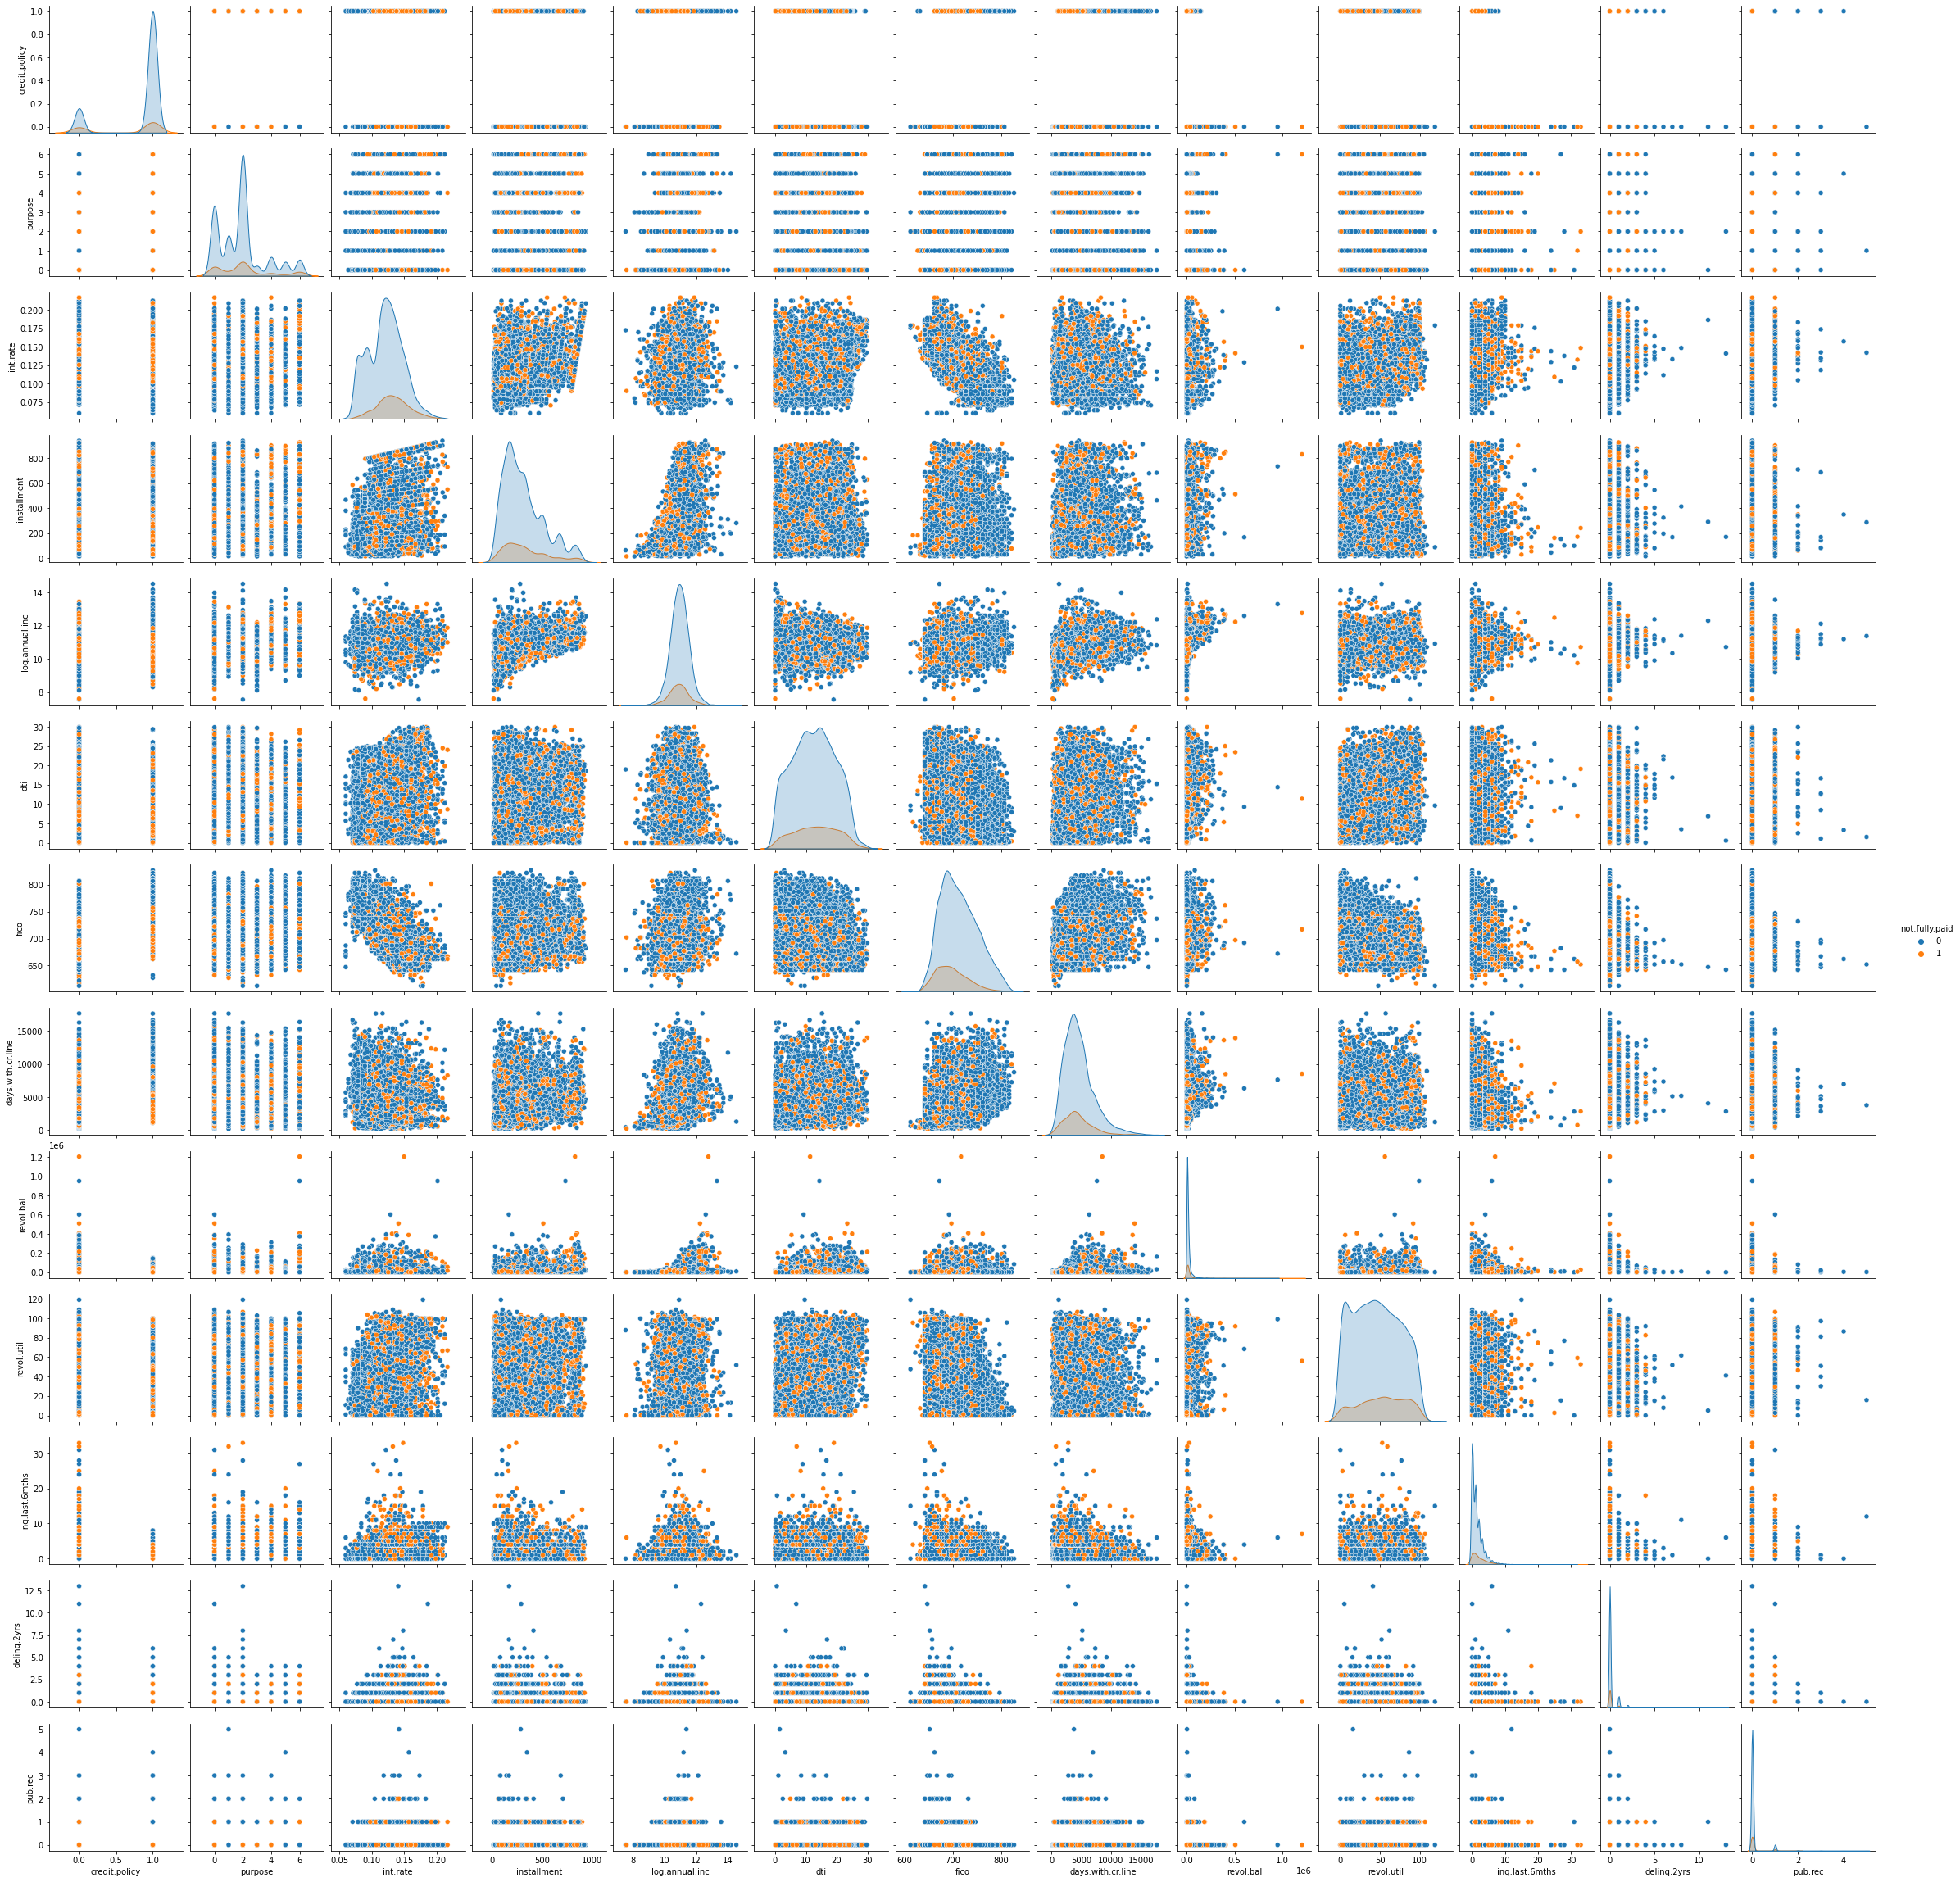

In [32]:
sns.pairplot(df,hue="not.fully.paid")

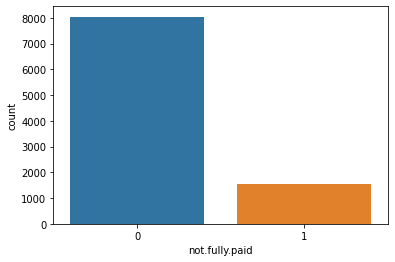

In [33]:
sns.countplot(x="not.fully.paid",data=df)

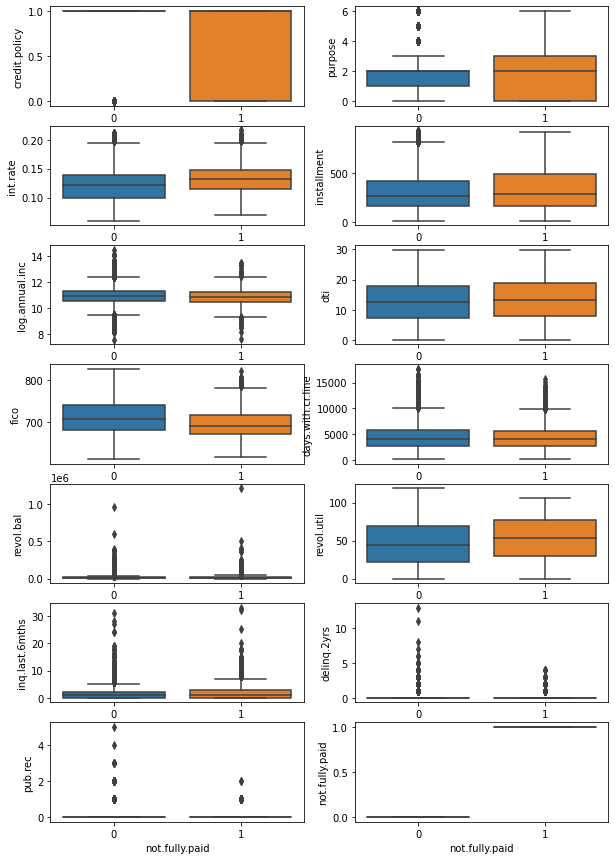

In [36]:
col=df.columns
plt.figure(figsize=(10,15))
for i in range(len(col)):
  plt.subplot(7,2,i+1)
  sns.boxplot(x='not.fully.paid',y=col[i],data=df)
plt.show()

# Making Model

In [14]:
num_col=df.columns

In [15]:
num_col

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [16]:
x=df[['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec']]

In [17]:
y=df[['not.fully.paid']]

In [18]:
from sklearn.model_selection import train_test_split as tts

In [19]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.4,random_state=83)

In [20]:
from sklearn.tree import DecisionTreeClassifier as dsc

In [21]:
model=dsc()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
pred=model.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as asc

In [25]:
print("Accuracy of model: ",round(asc(y_test,pred)*100,2),'%')

Accuracy of model:  74.45 %


In [26]:
print("Confusion Matrix: \n",cm(y_test,pred)) 

Confusion Matrix: 
 [[2710  518]
 [ 461  143]]


# Hyper Parameter Tumning

In [38]:
# entropy:
criteria=['gini','entropy']
tree_acc_criterion=[]
for i in criteria:
  classifier = dsc(criterion=i)

  classifier = classifier.fit(x_train,y_train)

  y_pred1 = classifier.predict(x_test)
  
  acc=round(asc(y_test,y_pred1)*100)
  
  print("criterion",i,"Accuracy->",acc, "%")

  tree_acc_criterion.append(acc)

criterion gini Accuracy-> 74 %
criterion entropy Accuracy-> 74 %


In [40]:
max_depth=np.arange(1,51,1)
tree_acc_depth=[]
for i in max_depth:
  classifier = dsc(max_depth=i)

  classifier = classifier.fit(x_train,y_train)

  y_pred2 = classifier.predict(x_test)
  
  acc=round(asc(y_test,y_pred2)*100)
  
  print("depth",i,"Accuracy->",acc, "%")

  tree_acc_depth.append(acc)

depth 1 Accuracy-> 84 %
depth 2 Accuracy-> 84 %
depth 3 Accuracy-> 84 %
depth 4 Accuracy-> 84 %
depth 5 Accuracy-> 84 %
depth 6 Accuracy-> 83 %
depth 7 Accuracy-> 83 %
depth 8 Accuracy-> 82 %
depth 9 Accuracy-> 81 %
depth 10 Accuracy-> 81 %
depth 11 Accuracy-> 80 %
depth 12 Accuracy-> 79 %
depth 13 Accuracy-> 79 %
depth 14 Accuracy-> 78 %
depth 15 Accuracy-> 78 %
depth 16 Accuracy-> 76 %
depth 17 Accuracy-> 76 %
depth 18 Accuracy-> 76 %
depth 19 Accuracy-> 75 %
depth 20 Accuracy-> 75 %
depth 21 Accuracy-> 75 %
depth 22 Accuracy-> 74 %
depth 23 Accuracy-> 74 %
depth 24 Accuracy-> 74 %
depth 25 Accuracy-> 74 %
depth 26 Accuracy-> 74 %
depth 27 Accuracy-> 74 %
depth 28 Accuracy-> 74 %
depth 29 Accuracy-> 73 %
depth 30 Accuracy-> 74 %
depth 31 Accuracy-> 74 %
depth 32 Accuracy-> 74 %
depth 33 Accuracy-> 74 %
depth 34 Accuracy-> 74 %
depth 35 Accuracy-> 74 %
depth 36 Accuracy-> 74 %
depth 37 Accuracy-> 73 %
depth 38 Accuracy-> 74 %
depth 39 Accuracy-> 74 %
depth 40 Accuracy-> 75 %
depth 41 

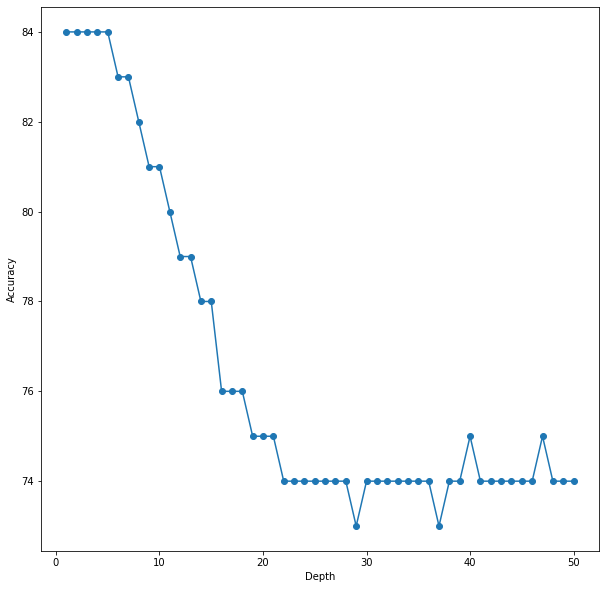

In [41]:
plt.figure(figsize=(10,10))
plt.plot(max_depth,tree_acc_depth,marker='o')
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()

In [42]:
print('max accuracy is',max(tree_acc_depth),'%')

max accuracy is 84 %
